# Calculating and Interpreting  `r`

## SWBAT

* Understand and calculate covariance between given variables
* Understand and calculate correlation between variables
* Verify the calculations for covariance and correlation using pandas methods
* Interpret the results of pearson correlation coefficient  



### Introduction to Covariance 

In probability theory and statistics, covariance is a measure of the degree to which two random variables (X, Y) change together. If the variables tend to show similar behavior, the covariance is positive. 

In the opposite case, when the greater values of one variable mainly correspond to the smaller values of the other, the covariance is negative.

Covariance is calculated as:  ![](Co-variance.jpg)



Let's use a simple dataset to explore the idea of covariance and perform covariance calculation. 

### Dataset

The dataset (HeightWeight.csv) includes 20 heights (inches) and weights(pounds). At this point, you should be able to calculate the average height and average weight. You can also explain the medians, variances and standard deviations for this dataset. 

But all of those measurements are only concerned with a **single** variable. What if we want to see **how height interacts with weight?** Does weight increase as height increases?

Note while there are plenty of fat short people and overly skinny tall people, when you look at the population at large, taller people will tend to weigh more than shorter people. This generalization of information is very common as it shows you a bigger picture that you can build your intuitions upon. 

Let's try to calculate covariance using formula shown above.

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import math

In [2]:
# Read the dataset HeightWeight.csv into a pandas dataframe

data = pd.read_csv('HeightWeight.csv', 
                   header = None)

# Assign column names to data set
data.columns = ['height','weight']

# View a fragmant of resulting dataset
data.head()

#   height- weight
# 0	68  	165
# 1	71  	201
# 2	61  	140
# 3	69  	170
# 4	71  	192

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


As a first step, Let's write a function that takes in a vector, calculates the mean of vector and subtracts the calculated mean value from each element to calculate `(xi - X(mean))`

In [3]:
def normalize(var):

    norm = [] # Vector for storing output values 
    n = 0     # a counter to identify the position of next element in vector
    mean = np.mean(var)
    
    # for each element in the vector, subtract from mean and add the result to norm
    for i in var:
        diff = var[n] - mean
        norm.append(diff)
        n = n + 1
    
    return norm

normalize(data.height)
# [1.1500000000000057,
#  4.150000000000006,
#  -5.849999999999994,
#  2.1500000000000057,
#  4.150000000000006,
#  -8.849999999999994,
#  5.150000000000006,
#  6.150000000000006,
#  -8.849999999999994,
#  7.150000000000006,
#  -5.849999999999994,
#  -7.849999999999994,
#  2.1500000000000057,
#  1.1500000000000057,
#  -2.8499999999999943,
#  2.1500000000000057,
#  5.150000000000006,
#  -0.8499999999999943,
#  -1.8499999999999943,
#  2.1500000000000057]

[1.1500000000000057,
 4.150000000000006,
 -5.849999999999994,
 2.1500000000000057,
 4.150000000000006,
 -8.849999999999994,
 5.150000000000006,
 6.150000000000006,
 -8.849999999999994,
 7.150000000000006,
 -5.849999999999994,
 -7.849999999999994,
 2.1500000000000057,
 1.1500000000000057,
 -2.8499999999999943,
 2.1500000000000057,
 5.150000000000006,
 -0.8499999999999943,
 -1.8499999999999943,
 2.1500000000000057]

In [4]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(data['height'])

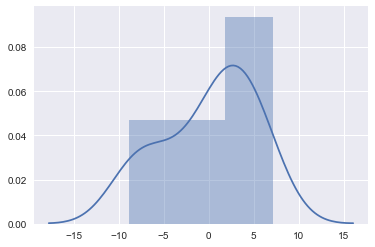

In [5]:
x = normalize(data.height)
sns.distplot(x)

Both distributions, before and after the mean normalization appear the same, however, we can see the post mean normalization, the mean of distribution has centred as 0. 

Once we have the mean normalized vectors, we need to take a dot product of the two vectors i.e. 

> `a[0] * b[0] + a[1] * b[1] + a[2] * b[2] ...`

Lets write another function that would take in two vectors and returns the dot product using formula above:

In [6]:
def dot_product(x,y):
    n = 0  # a counter pointing to the current element of vector(s)
    prod_vec = [] # Initliaze an empty list to store the results 
    
    # For all elements in the vectors, multiply and save results in prod_vec
    for i in range(len(x)):
        prod = x[i]* y[i]
        prod_vec.append(prod)
        n += 1
        
    dot_prod = np.sum(prod_vec)
    return dot_prod

a = [1,2,3]
b = [4,5,6]

dot_product(a,b)

#  32  calculated as (1*4 + 2*5 + 3*6)

32

So now we have the numerator of the formula all worked out, we should now be able to calculate covariance by calling these functions and dividing by n-1. 

Write a function `cov(var1, var2)` that would use the functions above to calculate the covariance of given variables, 

In [7]:
def cov(var1, var2):

    # Formula for covariance is:
    # [Sum (x_i - X)(y_i - Y)] / N-1 
    
    # Sanity Check : Check to see if both vectors are of same length
    # Exit the function if variables have different lengths

    if len(var1) != len(var2):
        return None 
    else: 
       
        # Mean normalize both variables 
        x = normalize(var1)
        y = normalize(var2)
        
        # Take the dot product of mean normalized variables
        result = dot_product(x,y)

        # divide the dot product by n-1    
        return result /((len(var1)) -1)

cov(data['height'], data['weight'])

#  144.75789473684208  

144.75789473684208

### Using Pandas `pd.cov()` function

We can verify out results by using Pandas buikt in function `pd.cov()`, that resturns a covariance matrix showing the covariance between all columns of a dataframe. 

In [8]:
data.cov()

,height,weight
height,26.134211,144.757895
weight,144.757895,839.326316


Success. We see that our calculated covariance value is same as the one calculated by Pandas `cov()` function. 

Let's now move to correlation and calculate/verify it just like above. 

## Pearson Correlation (r)

So we have another measurement known as correlation. A very basic correlation equation divides out the standard deviation of both height and weight. The result of a correlation is between 1 and -1. With -1 being perfect anti-correlation and 1 being perfect correlation. 0 mean no correlation exists.

![](correlation.png)

Now let’s build the co-variance function. Here we are taking the dot product of the variances of each element of height and weight. We then divide the result by the N-1 (the number of elements – 1 : the minus 1 is due to the fact we are dealing with sample data not population.

In [9]:
def corr(var1,var2):
    
    if len(var1) != len(var2):
        return None 
    else: 
       
        mean_norm_var1 = normalize(var1)
        mean_norm_var2 = normalize(var2)
        
        # Try the numpy way for calculating doc product
        var1_dot_var2 = [a * b for a, b in list(zip(mean_norm_var1, mean_norm_var2))]
        
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        
        return np.round(sum(var1_dot_var2) / math.sqrt(sum(var1_squared) * sum(var2_squared)), 2)

corr(data['height'], data['weight'])

0.98

The result of correlation i.e. the pearson's r value in this case is equal to 1, indicating a high correlation between heights and weights. Let's use pandas `pd.corr()`  and/or numpy's `np.corrcoef()` function to verify our result

In [10]:
data.corr()

,height,weight
height,1.0000,0.9774
weight,0.9774,1.0000


In [11]:
np.corrcoef(data.weight, data.height)

array([[1.        , 0.97739957],
       [0.97739957, 1.        ]])

Brilliant. Our results have been verified and this also indicates that with an increase in height, the weight of an individual increases accordingly. We can visualize the data columns to confirm our intuition. 

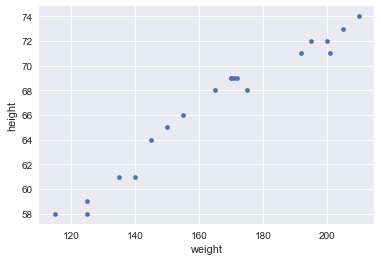

In [12]:
data.plot.scatter(x = 'weight', y = 'height')

The graph above confirms our findings as we can see a liear relationship between weights and heights i.e. weight increases with increasing height and vice versa. 

Let's quickly try to input two vectors which dont change together like the example above and see the effect on the correlation. 

Create some dummy vectors to calculate correlation between variables that highly correlate, somewhat correlate and dont correlate at all. 

In [13]:
# A quick test 

a = [2,4,6,8,10]
b = [3, -9, .001, 100, -36]
c = [2,4,6,8,-10]
d = [-2,-4,-6,-8,-10]
print (corr(a,a), corr(a,b), corr(a,c), corr(a,d)) 

1.0 0.09 -0.45 -1.0


## Summary 

This lab explains the calculations for covariance and correlation and how to interpret the values for both of these. We learnt to measure and represent how strongly two random variables as correlation. Covariance is nothing but a measure of correlation. On the contrary, correlation refers to the scaled form of covariance.

>Correlation is dimensionless, i.e. it is a unit-free measure of the relationship between variables. Covariance is a measure of correlation. 